In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Logistic Regression

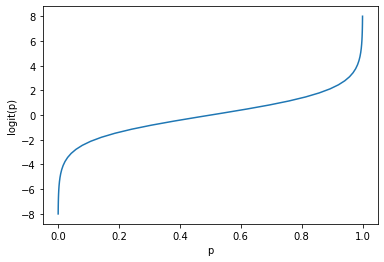

In [79]:
## logistic function

def logistic(x):                        # define the logistic function
    return 1 / (1 + np.exp(-x))


x_space = np.linspace(-8, 8)            # x_space is the range of x values we want to plot
plt.plot(logistic(x_space), x_space)    # plot the logistic function
plt.xlabel('p')                         # label the x-axis
plt.ylabel('logit(p)')                  # label the y-axis
plt.show()                              # show the plot

In [80]:
# generate some random data
np.random.seed(5) # set seed
n_sample = 100    # number of samples
a = 3.0           # slope
b = -9.0          # intercept

x = np.random.uniform(1, 5, size=n_sample)    # generate random x values
x = np.sort(x)                                # sort the x values

q = logistic(a * x + b)                       # calculate the probability
y = np.random.binomial(n=1, p=q)              # generate random binary outcomes

X, y = sm.add_constant(x), y                  # add a constant to the x values

In [81]:
print('X\n', X[:5])                           # print the first 5 rows of X
print('y\n', y[:30])                          # print the first 30 rows of y

X
 [[1.         1.00656869]
 [1.         1.00885685]
 [1.         1.04947765]
 [1.         1.08156551]
 [1.         1.09173237]]
y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


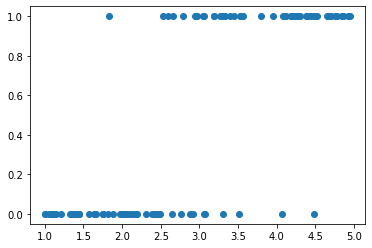

In [82]:
plt.scatter(x,y)                               # plot the data
plt.show()                                     # show the plot

In [83]:
# Fit Logistic regression
model = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()  # fit the model with the logistic link function and binomial family
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Tue, 30 Apr 2024   Deviance:                       63.016
Time:                        20:09:11   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

In [84]:
y_pred = model.predict(X)   # this is the predicted y 
y_pred

array([0.00987875, 0.00993308, 0.01094838, 0.01182239, 0.01211344,
       0.01227365, 0.01285077, 0.01366091, 0.01585859, 0.02101221,
       0.022196  , 0.02386823, 0.02540949, 0.0279958 , 0.02808635,
       0.0281495 , 0.03815479, 0.04351285, 0.04655328, 0.05703414,
       0.05739638, 0.05752912, 0.06646208, 0.06777399, 0.07773856,
       0.09470125, 0.10063488, 0.10270732, 0.10772971, 0.11414842,
       0.12249788, 0.13396615, 0.14729298, 0.14817159, 0.18983403,
       0.21886815, 0.22907858, 0.24474984, 0.25276551, 0.26396269,
       0.28694598, 0.31868771, 0.34539421, 0.35166404, 0.41349503,
       0.42599221, 0.48084991, 0.50226886, 0.51822075, 0.52662929,
       0.53869184, 0.57911184, 0.58942208, 0.59114273, 0.59801848,
       0.66101055, 0.66122351, 0.70241244, 0.71547301, 0.72531197,
       0.72948848, 0.73642948, 0.76613273, 0.78600651, 0.81246093,
       0.81681591, 0.82196104, 0.82689708, 0.82816523, 0.89606168,
       0.92608135, 0.94235092, 0.94489871, 0.94910604, 0.95591

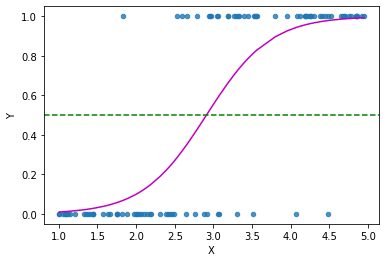

In [85]:
idx = x.argsort()                                       # sort the x values to plot the line
x_ord, y_pred_ord = x[idx], y_pred[idx]                 # order the x and y values with the sorted index
plt.plot(x_ord, y_pred_ord, color='m')                  # plot the predicted probability values 
plt.scatter(x, y,  s=20, alpha=0.8)                     # plot the data
plt.xlabel("X")                                         # label the x-axis
plt.ylabel("Y")                                         # label the y-axis
plt.axhline(y=0.5, color='green', linestyle='--')       # add a horizontal line at y=0.5
plt.show()                                              # show the plot

### Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix
y_true = y                                              # true values
y_pred_class = (y_pred > 0.5)                           # predicted values with a threshold of 0.5
cm = confusion_matrix(y_true, y_pred_class)             # calculate the confusion matrix
cm

array([[42,  7],
       [ 5, 46]])

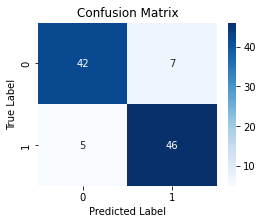

In [87]:
import seaborn as sns
# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(4, 3))                              # set the figure size    
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')      # plot the confusion matrix
plt.xlabel('Predicted Label')                           # label the x-axis
plt.ylabel('True Label')                                # label the y-axis
plt.title('Confusion Matrix')                           # add the title
plt.show()                                              # show the plot

### ROC Curve

In [88]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(X)                                   # predicted probability
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)          # y_pred is the prediction probability, y is the true value
# fpr = false positive rate = 1 - specificity
# tpr = true positive rate = recall = sensitivity
roc_auc = metrics.auc(fpr, tpr)                             # calculate the AUC of the ROC curve
print('auc', roc_auc)

auc 0.9415766306522608


In [ ]:
print(threshold)

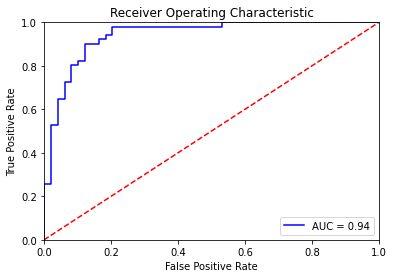

In [89]:
import matplotlib.pyplot as plt
# plot the ROC curve
plt.title('Receiver Operating Characteristic')                  # add the title
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)        # ROC curve is a plot of 1 - specificity and sensitivity(recall)
plt.legend(loc = 'lower right')                                 # add the legend
plt.plot([0, 1], [0, 1],'r--')                                  # add a diagonal line
plt.xlim([0, 1])                                                # set the x-axis limits to [0,1]
plt.ylim([0, 1])                                                # set the y-axis limits to [0,1]
plt.ylabel('True Positive Rate')                                # label the y-axis
plt.xlabel('False Positive Rate')                               # label the x-axis
plt.show()                                                      # show the plot

### F1 score

In [90]:
metrics.f1_score(y, y_pred_class)                               # F1 score. Here, y_pred_class is the predicted class

0.8846153846153846

## Other ways of Logistic Regression

### 1st way

In [91]:
model = sm.Logit(y, X).fit()                                   # fit the logistic regression model with the logit link function

Optimization terminated successfully.
         Current function value: 0.315079
         Iterations 7


In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.5453
Time:                        20:11:34   Log-Likelihood:                -31.508
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 3.520e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

### 2nd way

In [93]:
from sklearn.linear_model import LogisticRegression
# sklearn output
model = LogisticRegression(solver='lbfgs',fit_intercept = False, C = 1e9)   # set the logistic regression model with the solver as 'lbfgs', C is the inverse of regularization strength
mdl = model.fit(X, y)                                                       # fit the model
model.coef_                                                                 # print the coefficients

array([[-7.04458208,  2.42114067]])

# 2. Multinomial Logistic Regression

In [94]:
from sklearn import datasets
iris = datasets.load_iris()                 # load the iris dataset
X = iris.data                               # features
y = iris.target                             # target

print('X\n', X[:10])                        # print the first 10 rows of X
print('y\n', y)                             # print the target y

X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


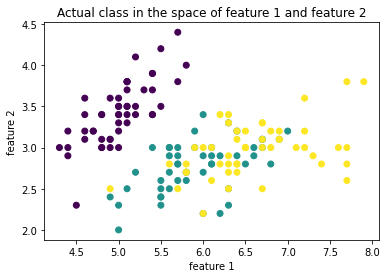

In [95]:
plt.scatter(X[:,0], X[:,1], c=y)                                    # plot the data with the first two features and color by the target
plt.title('Actual class in the space of feature 1 and feature 2')   # add the title
plt.xlabel('feature 1')                                             # label the x-axis   
plt.ylabel('feature 2')                                             # label the y-axis
plt.show()                                                          # show the plot

In [96]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = 1e9)      # fit the multinomial logistic regression model
# here C is a regularization term like we had for lasso and ridge, a smaller number means large regularization
lr.fit(X,y)   # fit the model

LogisticRegression(C=1000000000.0, multi_class='multinomial')

In [97]:
print('beta_k0\n',lr.intercept_)                                # print the intercept
print('beta_k1, beta_k2, beta_k3, beta_k4\n', lr.coef_)         # print the coefficients
# In class we said that we only need (p+1)*(K-1) coefficietns. Here it is (p+1)*K. 
# If you see carefully, you will see that the last row is redundant given first two rows. 
# When solving numerically in computer, they need this extra row. 

beta_k0
 [  3.97750564  19.33027251 -23.30777816]
beta_k1, beta_k2, beta_k3, beta_k4
 [[  7.35271466  20.39778454 -30.26348739 -14.14337754]
 [ -2.44376492  -6.85843959  10.41704506  -2.07138612]
 [ -4.90894974 -13.53934495  19.84644233  16.21476366]]


In [98]:
# confusion matrix
y_pred = lr.predict(X)                                        # predicted class
confusion_matrix(y,y_pred)                                    # confusion matrix

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [99]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
f1_score(y, y_pred, average='weighted')                       # F1 score

0.9866666666666667

In [100]:
y_proba = lr.predict_proba(X)                                 # predicted probabilities

In [101]:
roc_auc_score(y, y_proba, average= 'weighted', multi_class='ovr')  # ROC AUC score for multiclass classification using one-vs-rest strategy 

0.9990666666666668

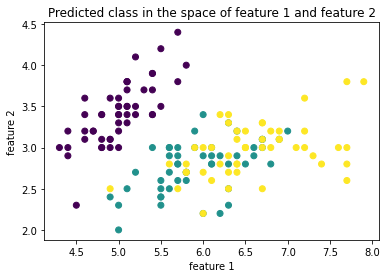

In [102]:
# a simple plot showing feature 1 and feature 2 and our prediction results
plt.scatter(X[:,0], X[:,1], c=y_pred)                                   # plot the data with the first two features and color by the predicted class
plt.title('Predicted class in the space of feature 1 and feature 2')    # add the title
plt.xlabel('feature 1')                                                 # label the x-axis
plt.ylabel('feature 2')                                                 # label the y-axis
plt.show()                                                              # show the plot

# 3. Poisson Regression

## Poisson Distribution

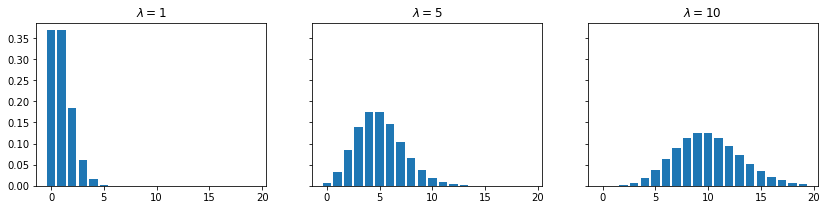

In [103]:
import scipy as sp
## Show how Poissson distribution looks for each lambda
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)     # create a figure with 3 subplots in a row, sharey=True means they will have the same y-axis

xx = np.arange(20)                                               # generate x values from 0 to 19
lambdas = [1, 5, 10]                                             # lambda values for the Poisson distribution

for i, lam in enumerate(lambdas):                                # loop through the lambda values
    yy = sp.stats.poisson.pmf(xx, lam)                           # calculate the Poisson probability mass function
    axes[i].bar(xx, yy)                                          # plot the Poisson distribution for the lambda value using bars
    axes[i].set_title(r'$\lambda={}$'.format(lam))               # add the title

plt.show()

## Poisson regression

In [104]:
# generate simulation data
np.random.seed(5)               # set seed for reproducibility
n_sample = 100                  # number of samples
a = 0.6                         # slope
b = -0.4                        # intercept

x = np.random.uniform(1, 5, size=n_sample)   # generate random x values
mu = np.exp(a * x + b)                       # calculate the mean of the Poisson distribution
y = np.random.poisson(mu)                    # generate random Poisson outcomes

In [105]:
print(x[:5])                            # print the first 5 rows of x
print(y[:5])                            # print the first 5 rows of y

[1.88797268 4.48292922 1.82687662 4.67444363 2.95364476]
[ 2 11  7  5  3]


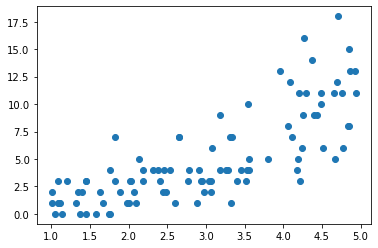

In [106]:
plt.scatter(x,y)                    # plot the data
plt.show()                          # show the plot

In [107]:
X, y = sm.add_constant(x), y                                                            # add a constant to the x values
model = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()    # fit the model with the Poisson link function and Poisson family
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Tue, 30 Apr 2024   Deviance:                       120.86
Time:                        20:15:23   Pearson chi2:                     115.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8754
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

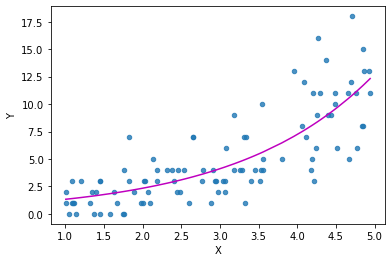

In [108]:
y_pred = model.predict(X)                    # predicted y values

idx = x.argsort()                            # sort the x values to plot the line
x_ord, y_pred_ord = x[idx], y_pred[idx]      # order the x and y values with the sorted index
plt.plot(x_ord, y_pred_ord, color='m')       # plot the predicted Poisson values 
plt.scatter(x, y,  s=20, alpha=0.8)          # plot the data, s is the size of the points, alpha is the transparency
plt.xlabel("X")                              # label the x-axis
plt.ylabel("Y")                              # label the y-axis
plt.show()

# 4. Probit Regression

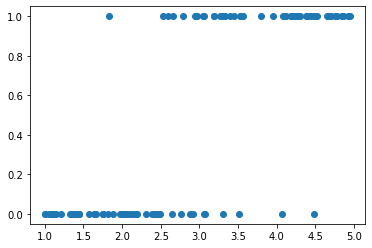

In [109]:
# generate some random data. Same as Logistic regression
np.random.seed(5) # set seed
n_sample = 100   # number of samples
a = 3.0          # slope
b = -9.0         # intercept

x = np.random.uniform(1, 5, size=n_sample)  # generate random x values
x = np.sort(x)                              # sort the x values

q = logistic(a * x + b)                     # calculate the probability
y = np.random.binomial(n=1, p=q)            # generate random binary outcomes

plt.scatter(x,y)
plt.show()

In [110]:
X, y = sm.add_constant(x), y                                                                      # add a constant to the x values
model_logistic = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()  # fit the model with the logistic link function and binomial family
model_probit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.probit())).fit()   # fit the model with the probit link function and binomial family
model_probit.summary()                                                                            # print the summary of the probit model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.785
Date:                Tue, 30 Apr 2024   Deviance:                       63.570
Time:                        20:16:04   Pearson chi2:                     107.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5277
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8743      0.662     -5.855      0.000      -5.171      -2.577
x1             1.3184      0.219      6.030      0.000       0.890       1.747
==============================================================================
"""

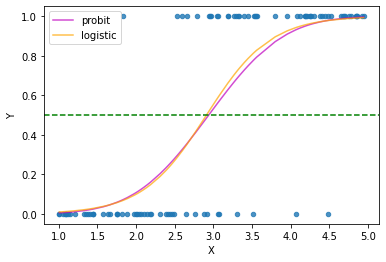

In [111]:
y_pred_probit = model_probit.predict(X)       # predicted y values for the probit model
y_pred_logistic = model_logistic.predict(X)   # predicted y values for the logistic model

idx = x.argsort()                             # sort the x values to plot the line
x_ord, y_pred_ord_probit, y_pred_ord_logistic = x[idx], y_pred_probit[idx], y_pred_logistic[idx]   # order the x and y values with the sorted index   
plt.plot(x_ord, y_pred_ord_probit, color='m', alpha=0.7, label='probit')                           # plot the predicted probability values for the probit model
plt.plot(x_ord, y_pred_ord_logistic, color='orange', alpha=0.7, label='logistic')                  # plot the predicted probability values for the logistic model
plt.scatter(x, y,  s=20, alpha=0.8)                                                                # plot the data
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(y=0.5, color='green', linestyle='--')                                                  # add a horizontal line at y=0.5
plt.legend()
plt.show()

# 5. Custom GLM

In [112]:
np.random.seed(5)
n_sample = 100  # number of samples
a = 0.6         # slope
b = -0.4        # intercept 
sd = 0.8        # standard deviation

x = np.random.uniform(1, 5, size=n_sample)  # generate random x values
mu = np.exp(a * x + b)                      # calculate the mean of the normal distribution
y = np.random.normal(mu, sd)                # generate random normal outcomes

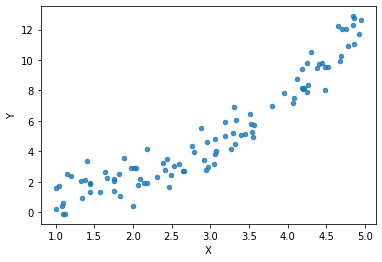

In [113]:
plt.scatter(x, y,  s=20, alpha=0.8)         # plot the data, s is the size of the points, alpha is the transparency
plt.xlabel("X") 
plt.ylabel("Y")
plt.show()

In [114]:
X,y = sm.add_constant(x),y                                                       # add a constant to the x values

# Normal distribution + log link function
model = sm.GLM(y, X, family=sm.families.Gaussian(sm.families.links.log())).fit() # fit the model with the log link function and Gaussian family
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.69261
Method:                          IRLS   Log-Likelihood:                -122.53
Date:                Tue, 30 Apr 2024   Deviance:                       67.876
Time:                        20:16:39   Pearson chi2:                     67.9
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3115      0.075     -4.130      0.000      -0.459      -0.164
x1             0.5789      0.018     32.984      0.000       0.545       0.613
==============================================================================
"""

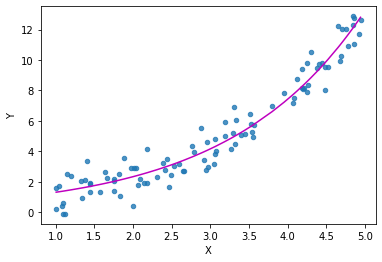

In [115]:
y_pred = model.predict(X)                   # predicted y values

idx = x.argsort()                           # sort the x values to plot the line
x_ord, y_pred_ord = x[idx], y_pred[idx]     # order the x and y values with the sorted index

plt.plot(x_ord, y_pred_ord, color='m')      # plot the predicted values
plt.scatter(x, y,  s=20, alpha=0.8)         # plot the data
plt.xlabel("X")
plt.ylabel("Y")
plt.show()